## Distribution Plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips') # seaborn comes with preloaded datasets

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


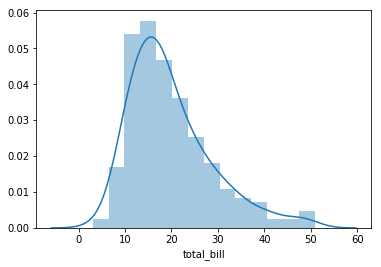

In [9]:
sns.distplot(tips['total_bill']) # don't worry about the warning

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


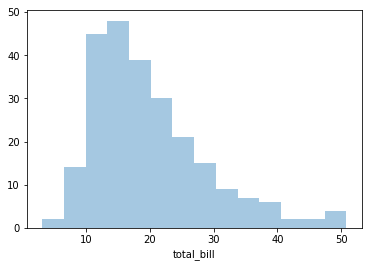

In [8]:
sns.distplot(tips['total_bill'], kde=False) # KDE - the line, "kernal density estimation"

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


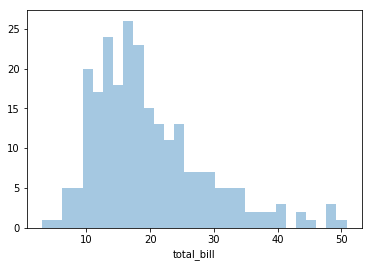

In [10]:
sns.distplot(tips['total_bill'], kde=False, bins=30) # bins -> how much definition to plot by

### Joint Plots

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


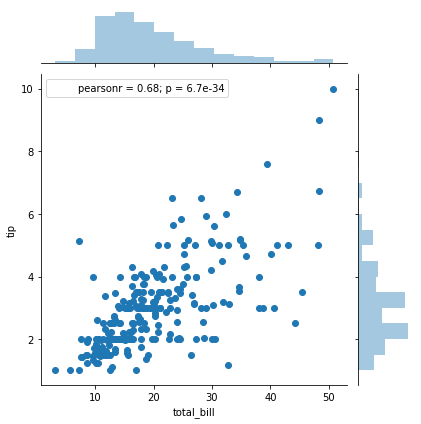

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


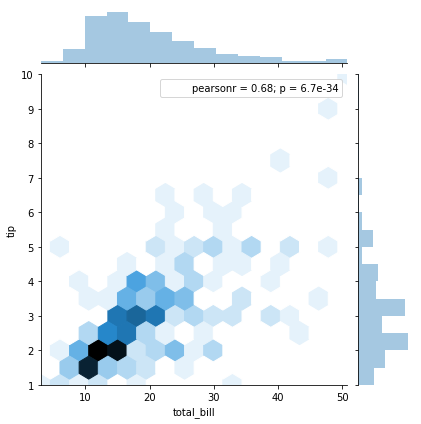

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex') # kind lets you control the type of graph in the middle

### Pair Plot

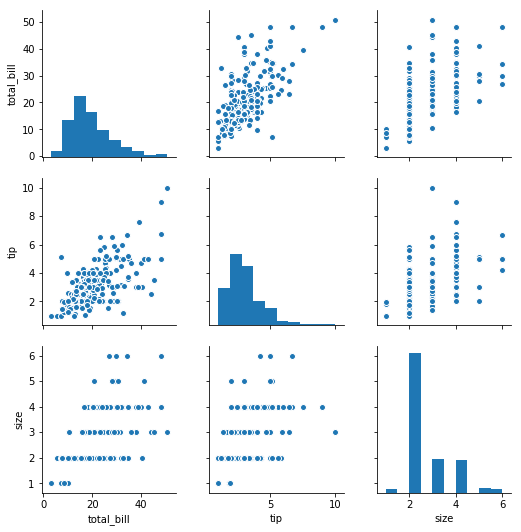

In [16]:
sns.pairplot(tips) # do jointplot for every possible combination of the dataframe

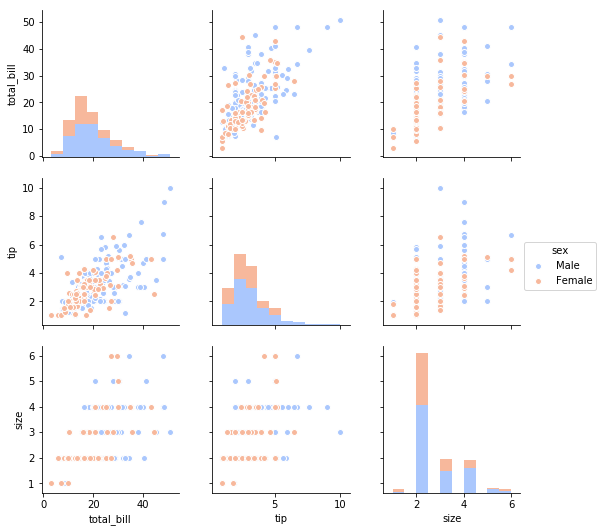

In [18]:
sns.pairplot(tips, hue="sex", palette="coolwarm") # provides legend for categorical column

### Rug Plots

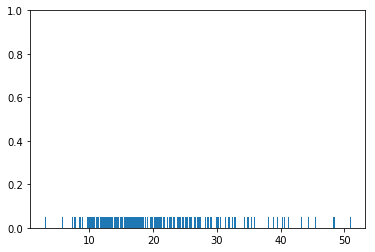

In [19]:
sns.rugplot(tips['total_bill']) # draws a line for every point, denser -> more matches

(0, 1)

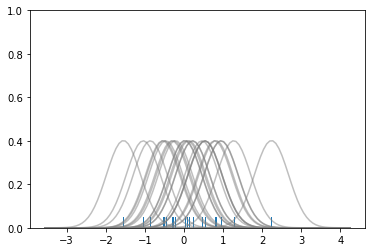

In [20]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

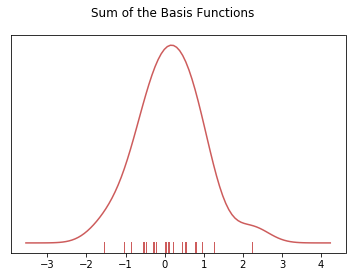

In [21]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

## Categorical Plots

In [22]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Bar plot

In [26]:
import numpy as np

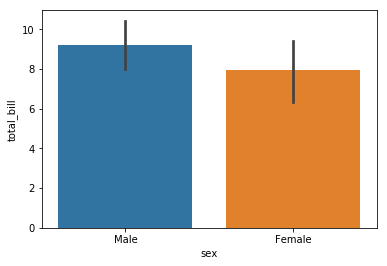

In [27]:
sns.barplot(x='sex',y='total_bill', data=tips, estimator=np.std) # by default y axis is average

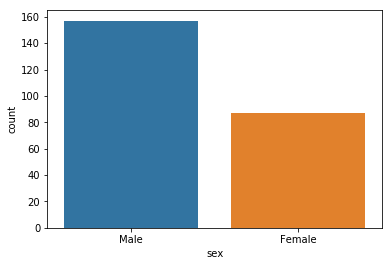

In [28]:
sns.countplot(x='sex', data=tips) # returns count group by x

### Box Plot

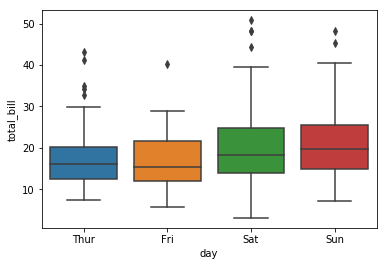

In [32]:
# box -> quartiles, whiskers -> rest of distribution, points -> outliers
sns.boxplot(x='day',y='total_bill', data=tips)

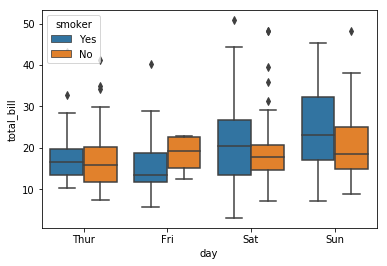

In [33]:
sns.boxplot(x='day',y='total_bill', data=tips, hue="smoker")

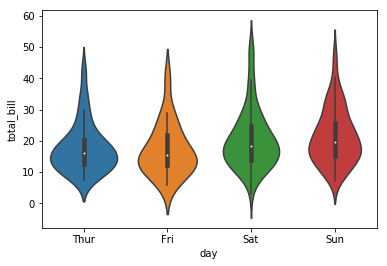

In [34]:
# plots all data points, KDE of data, data is mirrored down the spine
sns.violinplot(x='day', y='total_bill', data=tips)

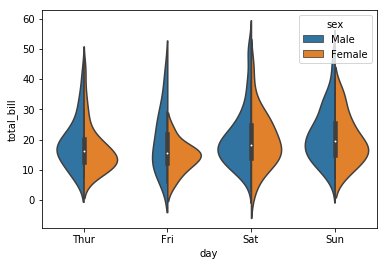

In [36]:
sns.violinplot(x='day', y='total_bill', data=tips, hue="sex", split=True)

### Strip Plots

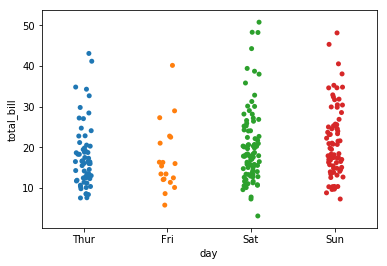

In [38]:
# categorical scatter plot, jitter seperates the points more
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


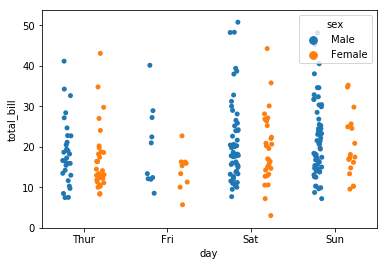

In [39]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue="sex", split=True)

### Swarm Plots

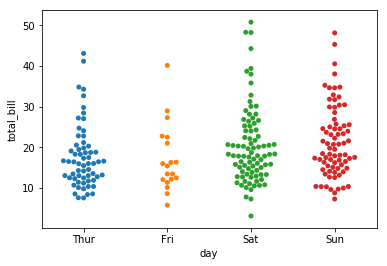

In [41]:
# stripplot with no overlaps, looks like violin plot
# doesn't scale well
sns.swarmplot(x='day', y='total_bill', data=tips)

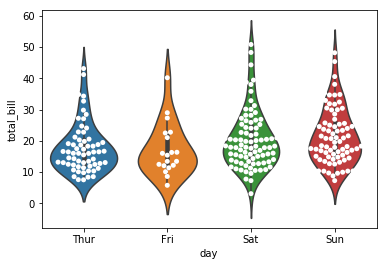

In [43]:
# you can overlap graphs
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='white')

### Factor Plots

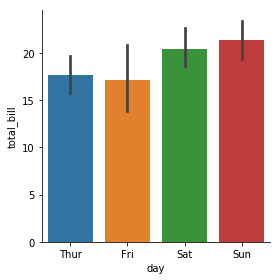

In [44]:
# can create any plot with this call and the corresponding kind
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')